<a href="https://colab.research.google.com/github/Jcnok/modelos-ml-python/blob/master/Medical_Cost_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prevendo os custos de tratamento de pacientes, utilizando a aprendizagem de máquina.

![](https://img.rawpixel.com/s3fs-private/rawpixel_images/website_content/rm373batch7-202.jpg?w=800&dpr=1&fit=default&crop=default&q=65&vib=3&con=3&usm=15&bg=F4F4F3&ixlib=js-2.2.1&s=332d84a34167996dd957df1f1c045571)

 * Hoje vamos explorar um conjunto de dados '[Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)' fornecido pelo Kaggle. O conjunto possui os dados de custos de tratamento de diferentes pacientes. Apesar do conjunto não dispor de dados sobre o diagnóstico dos pacientes, temos algumas informações que podem nos ajudar a chegar a uma conclusão sobre o estados dos mesmos e tentar prever os custos do seguro com a maior precisão possível.
 *  Descrição das variáveis:

  - **Age**: idade do beneficiário principal.

  - **Sex**: sexo do contratante do seguro, feminino, masculino.

  - **Bmi**: Índice de massa corporal.

  - **Children**: Número de filhos cobertos pelo seguro saúde / Número de dependentes.

  - **Smoker**: fumante ou não fumante.

  - **Region**: área residencial do beneficiário nos EUA, nordeste, sudeste, sudoeste, noroeste.

  - **Charges**: despesas médicas individuais cobradas pelo seguro saúde.

# 1 - Importando as bibliotecas e Carregando o data set para análise!

In [ ]:
#instalação do pacote Lazy para testar vários modelos em uma única vez!
#!pip install Lazypredict


In [ ]:
#instalação do pacote yellowbrick para visualização gráfica dos erros/acertos dos modelos.
#!pip install  yellowbrick

In [ ]:
# importando a bibliotera para visualização dos erros
#from yellowbrick.regressor import PredictionError
#biblioteca para testar vários modelos juntos!
#from lazypredict.Supervised import LazyRegressor

In [4]:
# Carregamento e análise dos dados!
import pandas as pd
import numpy as np
#Bibliotera para análise estatística!
#from scipy.stats import norm, boxcox
#from scipy import stats

# visualização gráfica!
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#importe das bibliotecas necessárias para nossa análise.

# Carregamento e análise dos dados!
import pandas as pd
import numpy as np
#Bibliotera para análise estatística!
#from scipy.stats import norm, boxcox
#from scipy import stats

# visualização gráfica!
import matplotlib.pyplot as plt
import seaborn as sns

#ML!
# Divisão do modelo para treino e teste!
from sklearn.model_selection import train_test_split
# Modelos para testes individuais!
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
#métricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# verificando o tamanho do meu dataset
print('qtd linhas x qtd colunas')
df.shape

qtd linhas x qtd colunas


(1338, 7)

In [5]:
# visualizando os tipos de variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Descrição dos dados numericos
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 2 - Perguntas a serem respondidas pela análise dos dados!

* *1. Quem teve mais despesas? Homem ou Mulher?*

In [7]:
df[['sex','charges']].groupby(['sex']).mean()

,charges
sex,
female,12569.578844
male,13956.751178


R.: Pela média aparentemente o sexo masculino foi quem tem um custo maior. 
Para confirmar podemos analisar os dados separadamente, com uma análise mais detalhada.


* *2. Informe o maior e o menor custo de ambos os sexos?*

In [8]:
df[['sex','charges']].groupby(['sex']).describe()

charges                ...                           
         count          mean  ...           75%          max
sex                           ...                           
female   662.0  12569.578844  ...  14454.691825  63770.42801
male     676.0  13956.751178  ...  18989.590250  62592.87309

[2 rows x 8 columns]

R.: com o método describe, conseguimos responder a pergunta, além de obter mais detalhes para uma melhor confirmação. Já sabemos que os dados estão bem divididos entre os sexos e que tanto o custo minimo quanto o máximo são mais elevados para as mulheres. O desvio padrão para as mulheres é menor, o que indica uma menor variabilidade. Outro dado interessante é que até o segundo quartil(50%) as mulheres tem um custo maior que os homens.

* *3. Existem dados nulos ou em  branco no Dataset??*

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

R.: De acordo com a consulta não existem dados nulos no Dataset.

* *4. Existe alguma influência com realação ao fumantes e não fumantes?*


In [10]:
df[['smoker', 'charges']].groupby(['smoker']).mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [11]:
df[['smoker', 'charges']].groupby(['smoker']).describe()

charges                ...                           
         count          mean  ...           75%          max
smoker                        ...                           
no      1064.0   8434.268298  ...  11362.887050  36910.60803
yes      274.0  32050.231832  ...  41019.207275  63770.42801

[2 rows x 8 columns]

R.: Existe uma forte influência em relação aos fumantes. Podemos perceber que apesar dos fumantes representarem apenas cerca de 20% dos dados eles tem um custo 3,8 vezes a mais do que os 80% dos não fumantes. Resultado bem expressivo.

# 3 -  Visualização e análise gráfica!.


* Verifique correlação entre as variáveis!

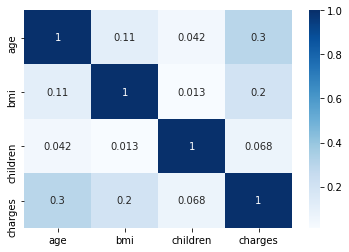

In [12]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")


R.: Apesar do gráfico no mostrar uma correlação baixa entre as variáveis, não podemos descartar uma análise mais profunda e detalhada sobre cada uma das variáveis. Inclusive aqui ainda não transformamos as variáveis['região', 'sex', 'smoker'].

* Demonstre a relação entre idade('age') e taxas('charges') separadas por fumante e não fumantes. 

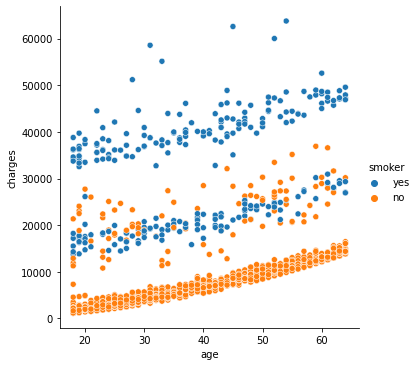

In [13]:
#gráfico de relação entre as variáveis: 'age' vs 'charges', separadas pela variável 'smoker'.
sns.relplot(x="age", y="charges", hue="smoker", data=df);


R. O gráfico confirma que, com o passar dos anos as despesas médicas tendem a aumentar tanto para os fumantes quanto para os não fumantes, claro de acordo com suas respectivas proporções, é nítido que os fumantes tem um custo expressivamente maior nesse conjunto.

* Demonstre a relação entre as variáveis 'BMI' e 'Charges' separado por fumantes e não fumantes.

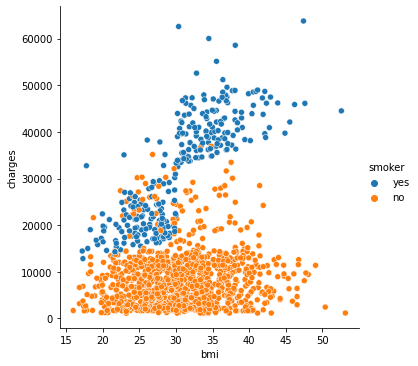

In [14]:
#gráfico de relação entre as variáveis: 'bmi' vs 'charges', separadas pela variável 'smoker'.
sns.relplot(x="bmi", y="charges", hue="smoker", data=df);


R.:  - Conforme a tabela abaixo, pode-se dizer que, nesse conjunto de dados, para os não fumantes, a relação 'bmi' vs 'charges' não é muito evidente, ou seja, pessoas obesas não tendem a ter um custo maior do que os não obesos, isso gera um pouco de dúvidas, pois acredito que deveria haver uma relação ascendente. Fica a disposição um estudo mais detalhado sobre esse fator para uma melhor confirmação. Já para os fumantes fica bem claro que, quanto maior o peso maior as despesas médicas.


**---Resultado	Situação---**

* Abaixo de 17	Muito abaixo do peso
* Entre 17 e 18,49	Abaixo do peso
* Entre 18,50 e 24,99	Peso normal
* Entre 25 e 29,99	Acima do peso
* Entre 30 e 34,99	Obesidade I
* Entre 35 e 39,99	Obesidade II (severa)
* Acima de 40	Obesidade III (mórbida)

obs: os dados foram obtidos do site: [wikipedia](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal)







* Demonstre, se existe alguma relação entre as variáveis 'children' e 'charges'.

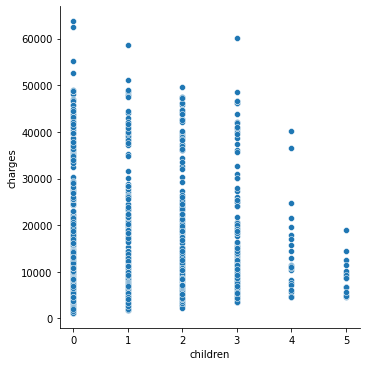

In [15]:
#gráfico de relação entre as variáveis: 'children' vs 'charges'.

sns.relplot(x="children", y="charges", data=df);


R.: Aqui podemos ver que os titulares que não possuem filhos inclusos, tendem a gastar mais do que os que possuem. Para os que possuem de 4 a 5 filhos, os custos caem de forma mais expressiva.


* Faça um gráfico que demonstre os gastos entre fumantes e não fumantes.

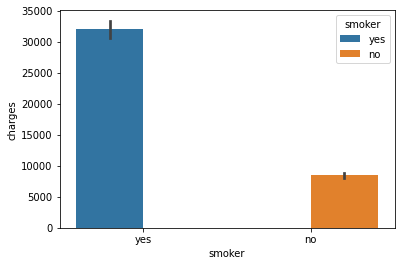

In [16]:
#gráfico de barras entre as variáveis: 'smoker' vs 'charges', separadas pela variável 'smoker'.
sns.barplot(x="smoker", y="charges", hue="smoker", data=df);


R.: O gráfico de relação entre as variáveis 'charges' vs 'smoker' confirma que os fumantes geram um custo expressivamente maior do que os não fumantes.

* Como estão divididos o conjunto de dados entre homens e mulheres? Exiba um gráfico para a comparação.

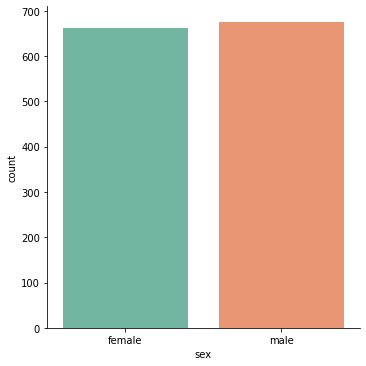

In [17]:
#Gráfica de barras da variável 'sex'.
sns.catplot(x="sex", kind="count", palette="Set2", data=df);


R.: Nosso conjunto está bem dividido entre homens e mulheres.

* Faça um gráfico dos custos separado pelo sexo. Quem está gerando um maior custo?

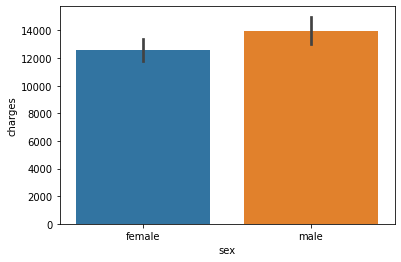

In [18]:
#Gráfico de barras entre as variáveis 'sex' vs 'charges'.
sns.barplot(x="sex", y="charges", data=df)


R.:  Opa um pouco estranho não? Os homens geram mais despesas do que as mulheres?. Sempre ouvi dizer que as mulheres se cuidam mais que os homens, consequentemente as mulheres não deveriam ter um custo maior já que o conjunto está bem balanceado entre homens e mulheres?

* Já que os homens geram um custo médico maior. Faça um gráfico que exiba a quantidade de fumantes e não fumantes separado por sexo.

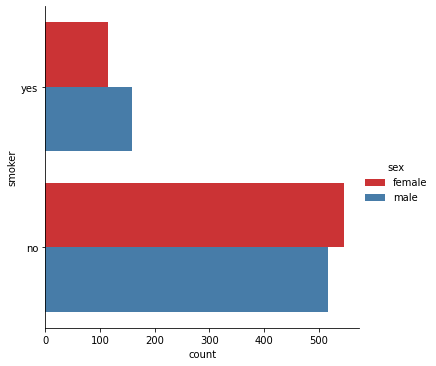

In [19]:
#Gráfico de barras 'smoker' separado por 'sex'.
sns.catplot(y="smoker", kind="count", palette="Set1", hue="sex", data=df);


R.:  Nesse consjunto as mulheres fumam menos que os homens, acredito que isso possa explicar porque os homens tem uma média de gastos maior do que as mulheres, já que existe um aumento de custo bem expressivo para os fumantes!

* Para confirmação podemos verificar a média dos custos dos fumantes e não fumantes separado pelos sexo.

In [20]:
df[['sex','smoker','charges']].groupby(['smoker','sex'], as_index= False).mean().sort_values('charges', ascending= False).style.background_gradient('Blues')

,smoker,sex,charges
3,yes,male,33042.005975
2,yes,female,30678.996276
0,no,female,8762.297300
1,no,male,8087.204731


R.: Dessa forma conseguimos concluir que na verdade, dentro do grupo de não fumantes que repesentam cerca de 80% de todo o conjunto, as mulheres tem um custo maior. Acredito eu, que nada mais justo, visto que de uma maneira geral as mulheres tendem a se preocupar mais com a saúde do que os homens. Já os fumantes, certa de 20% do nosso conjunto, apesar de um resultado expressivo em ambos os sexos os homens tem um custo maior, porém vale lembrar que proporcionalmente nesse conjunto existem mais fumantes homens do que mulheres.
* Outro ponto muito importante é que os custos são muito mais elevados para os fumantes independente do sexo, ou seja, o que leva a um aumento expressivo nos gastos, está mais relacionado a ser fumante ou não ser fumante. 

# 4 - Nesse momento, surgiram novas dúvidas, vamos tentar descobrir a resposta!

Até o momento não estudamos a variável region, vamos dar uma olhada nessa variável e tentar descobrir se a região impacta nos custos.
Neste momento, agora que já comecei a me acostumar e entender melhor o conjunto de dados, achei melhor elaborar algumas perguntas mais especificas e me aprofundar mais no assunto, para tal vou dividir o questionário por variáveis acho que se encaixa melhor no entendimento do conjunto, mãos a obra.

1. Primeiro vamos análisar o peso dos paciêntes do conjunto:
* O peso impacta nas despesas médicas?
* Categorizar o variável BMI? ex: Magro, Normal, Obeso e comparar com os custos!
* Será que Obesos fumantes gastam mais? Qual a média dos gastos? Pois acredito que devam ter mais problemas de saúde!

2. Vamos análisar a idade dos pacientes:
* Separar as idades por faixa etária?
* Existe alguma relação entre peso e idade? ex: será que na vida adulta, com o passar dos anos, as pessoas tendem a aumentar de peso? Acho que sim né? Pelo menos comigo foi assim, depois dos 30 não parei de ganhar peso rs....
* Confirmar se com o passar dos anos as despesas médicas aumentam (para fumantes e não fumantes).

3. Vamos analisar a variável Região e tentar extrair algumas informações:
* Existe alguma diferença de custo dependendo da localização geográfica? Estou curioso!
* Comparar idade vx smoker por região. Acredito que se houver diferença nos gastos por região, essa comparação mostrará o motivo.
* Qual das regiões as pessoas possuem mais filhos? Seria interessante se nesse consjunto tivesse a classe social....


Bom acho que podemos começar.....


* 1 -  Análise da variável BMI:


* Separar a variável por categoria, conforme a tabela abaixo vamos categorizar os dados.

  **---Resultado	Situação---**

  * Abaixo de 17	Muito abaixo do peso
  * Entre 17 e 18,49	Abaixo do peso
  * Entre 18,50 e 24,99	Peso normal
  * Entre 25 e 29,99	Acima do peso
  * Entre 30 e 34,99	Obesidade I
  * Entre 35 e 39,99	Obesidade II (severa)
  * Acima de 40	Obesidade III (mórbida)

obs: os dados foram obtidos do site: [wikipedia](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal)


In [21]:
#Análise a variável BMI
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [22]:
# Categorizando a var 'bmi' de acordo com a tabela acima.
lista = [df]

for i in lista:
  i.loc[i['bmi'] <=  18.49, 'Peso'] = 'Magro'
  i.loc[(i['bmi'] > 18.49) & (i['bmi'] <= 24.99), 'Peso'] = 'Normal'
  i.loc[(i['bmi'] > 24.99) & (i['bmi'] <= 29.99), 'Peso'] = 'Sobrepeso'
  i.loc[(i['bmi'] > 29.99), 'Peso'] = 'Obeso'
df.head()

,age,sex,bmi,children,smoker,region,charges,Peso
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obeso
2,28,male,33.000,3,no,southeast,4449.46200,Obeso
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso


* Gráfico de pizza em porcetagem da variável peso.

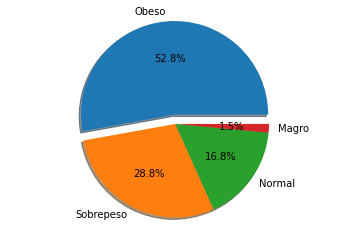

In [23]:
pesos = df.Peso.value_counts().values
labels = df.Peso.value_counts().index

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0, 0, 0) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(pesos, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# insere a legenda e a localização da legenda.
#plt.legend(labels, loc=3)


# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()

R.: Mais de 50% da nossa população são obesos e ao todo cerca de 80% estão acima do peso normal.

* Grafico de barras 'Peso' separado por fumantes e não fumantes.

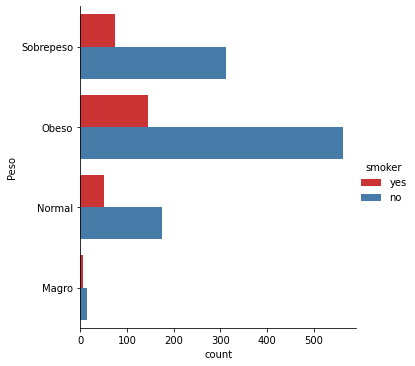

In [24]:
#Gráfico de barras 'Peso' separado por 'smoker'.
sns.catplot(y="Peso", kind="count", palette="Set1", hue="smoker", data=df);

* Os obesos fumantes são em maior número em relação aos demais, certamente eles gastam mais do que os demais, será que isso ocorre para os não fumantes também?

Gráfico de barras entre 'peso' vs 'charges', separadas por fumantes e não fumantes.

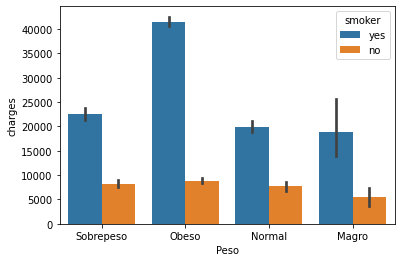

In [25]:
#gráfico de barras entre as variáveis: 'peso' vs 'charges', separadas pela variável 'smoker'.
sns.barplot(x="Peso", y="charges", hue="smoker", data=df);

R.: Confirmado a categoria obesos fumantes tem um custo expressivamente maior na despesas médicas, para os não fumantes esse valor é pouco visível.

* Gráfico de pizza em porcentagem da média dos custos entre fumantes e não fumantes.

Gastos por categoria de fumantes em porcentagem


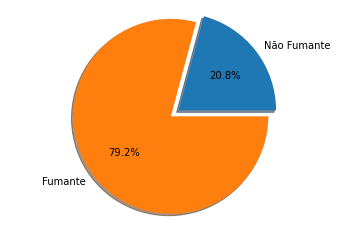

In [26]:
Media_charges = df[['charges', 'smoker']].groupby('smoker').mean().reset_index()
media_charges = Media_charges.charges.values
labels = ['Não Fumante', 'Fumante']

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(media_charges, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# insere a legenda e a localização da legenda.
#plt.legend(labels, loc=3)


# define que o gráfico será plotado em circulo
plt.axis('equal')

#plt.show()
print('Gastos por categoria de fumantes em porcentagem')

R.: aqui podemos concluir que os fumantes, apesar de representar a minoria(cerca de 20% da população) gera um custo médio de cerca de 80% dos gastos. O inverso também é válido para os não fumantes.

* Custo de fumantes e não fumantes em valores.

In [27]:
#df.query('smoker == "no"')['charges'].mean()
df[['charges', 'smoker']].groupby('smoker').mean().reset_index().values

array([['no', 8434.268297856199],
       ['yes', 32050.23183153285]], dtype=object)

* Tabela da media dos custos separada por peso e smoker.

In [28]:
df[['Peso','charges','smoker']].groupby(['Peso','smoker']).mean().sort_values('charges')

,,charges
Peso,smoker,
Magro,no,5532.992453
Normal,no,7685.656014
Sobrepeso,no,8257.961955
Obeso,no,8842.691548
Magro,yes,18809.824980
Normal,yes,19942.223641
Sobrepeso,yes,22495.874163
Obeso,yes,41557.989840


##  1 - Respostas das perguntas:

* O peso impacta nas despesas médicas?
  * *R. Sim, de acordo com as categorias, pessoas obesas tendem a ter um gasto maior, principalmente para os fumantes.*
* Categorizar o variável BMI? ex: Magro, Normal, Obeso e comparar com os custos!
  * *R. Pelas categorias podemos notar que mais de 50% de todo o conjunto são obesos e cerca de 28% estão com sobrepeso, ou seja cerca de 80% estão com peso acima do normal.*
* Será que Obesos fumantes gastam mais? Qual a média dos gastos? Pois acredito que devam ter mais problemas de saúde!
  * *R. Sim, os obesos fumantes possuem despesas expressivamente maiores do que os não fumantes.

* 2 - Análise da variável Idade('Age')


In [29]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

* Vamos categorizar a Idade da seguinte forma:

  * 18 a 38 -> Jovem_Adulto
  * 38 a 58 -> Adulto
  * Maior que 58 -> Idoso

obs: o critério foi realizado por mim, sem nenhum estudo, foi apenas por dedução.

In [30]:
list_age = [df]
for idade in list_age:
  idade.loc[(idade['age'] >= 18) & (idade['age'] < 39), 'cat_idade'] = 'jovem_adulto'
  idade.loc[(idade['age'] > 38) & (idade['age'] < 59), 'cat_idade'] = 'adulto'
  idade.loc[idade['age'] > 58, 'cat_idade'] = 'idoso'
df.head()

,age,sex,bmi,children,smoker,region,charges,Peso,cat_idade
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso,jovem_adulto
1,18,male,33.770,1,no,southeast,1725.55230,Obeso,jovem_adulto
2,28,male,33.000,3,no,southeast,4449.46200,Obeso,jovem_adulto
3,33,male,22.705,0,no,northwest,21984.47061,Normal,jovem_adulto
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso,jovem_adulto


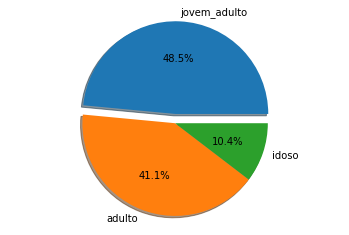

In [31]:
#Gráfico de piza em porcentagens da categoria idade.
cat_idade = df.cat_idade.value_counts(). values
labels = df.cat_idade.value_counts().index

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0, 0) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(cat_idade, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# insere a legenda e a localização da legenda.
#plt.legend(labels, loc=3)


# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()

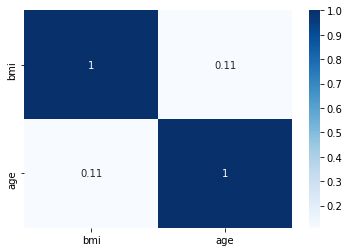

In [32]:
# verificando a correlação entre peso e idade.
sns.heatmap(df[['bmi','age']].corr(), annot=True, cmap="Blues")


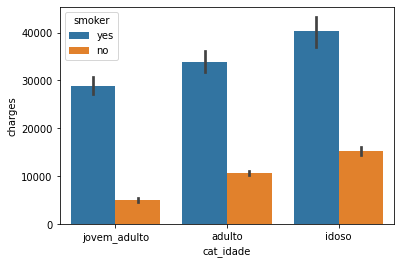

In [33]:
#gráfico de barras entre as variáveis: 'cat_idade' vs 'charges', separadas pela variável 'smoker'.
sns.barplot(x="cat_idade", y="charges", hue="smoker", data=df);

## 2 - Respostas das perguntas: 
* Separar as idades por faixa etária.
  * *R. Dentro da categoria que criamos, podemos determinar que a maior parte são jovens_adultos seguido de adultos, e com apenas cerca de 10% de Idosos.*
* Existe alguma relação entre peso e idade? ex: será que na vida adulta, com o passar dos anos, as pessoas tendem a aumentar de peso? Acho que sim né? Pelo menos comigo foi assim, depois dos 30 não parei de ganhar peso rs....
  * *R. Dentro do conjunto, a correlação entre idade e peso é muito fraca, ou seja, não possui uma forte influência no ganho de peso conforme a idade.*
* Confirmar se com o passar dos anos as despesas médicas aumentam (para fumantes e não fumantes).
  * *R. Sim, podemos observar que com o passar dos anos as despesas médicas aumentam tanto para os fumantes quanto para os não fumantes.

* 3 -  Análise da variável Região('region')

In [34]:
df.region.describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

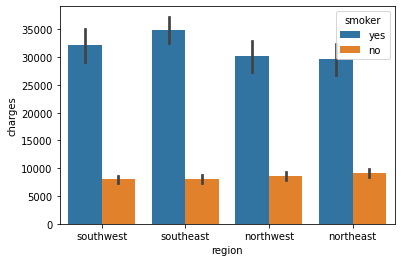

In [35]:
#gráfico de barras entre as variáveis: 'smoker' vs 'charges', separadas pela variável 'smoker'.
sns.barplot(x="region", y="charges", hue="smoker", data=df);

* A média dos gasts para os não fumantes são equivalentes por região, agora para os fumantes existe uma média de custo maior para as regiões sudeste e sudoeste, é possível que existe uma concentração maior nessas regiões, vamos verificar.... 

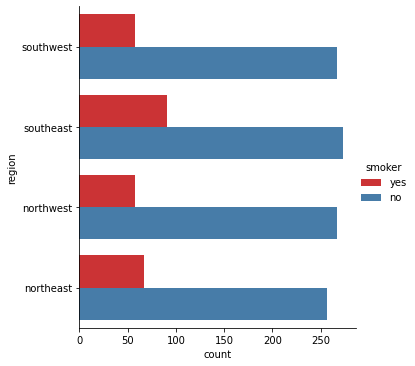

In [36]:
#Gráfico de barras 'region' separado por 'smoker'.
sns.catplot(y="region", kind="count", palette="Set1", hue="smoker", data=df);

* Exite uma concentração um pouco maior nas regiões sudeste e sudoeste, tanto para fumantes quanto não fumantes, o que provávelmente indica o motivo dos custos mais elevados.

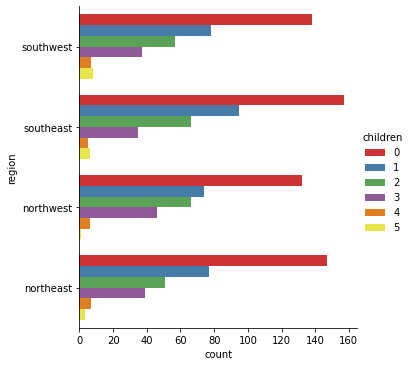

In [37]:
#Gráfico de barras 'region' separado por 'children'.
sns.catplot(y="region", kind="count", palette="Set1", hue="children", data=df);

In [38]:
df[['region','children', ]].groupby('region').sum().reset_index()


,region,children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


* As pessoas possuem mais filhos na região Sudeste.

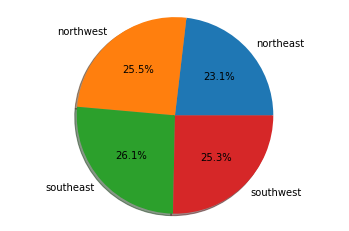

In [39]:
# Gráfico de pizza com a porcentagem a quantidade de filhos por região.
porc_region = df[['region','children', ]].groupby('region').sum().reset_index()
Porc_region = porc_region.children. values
labels = porc_region.region.values

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0, 0, 0, 0) 

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(Porc_region, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)

# insere a legenda e a localização da legenda.
#plt.legend(labels, loc=3)


# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()


In [40]:
df.groupby('region').count()

,age,sex,bmi,children,smoker,charges,Peso,cat_idade
region,,,,,,,,
northeast,324,324,324,324,324,324,324,324
northwest,325,325,325,325,325,325,325,325
southeast,364,364,364,364,364,364,364,364
southwest,325,325,325,325,325,325,325,325


## 3 - Respostas das perguntas:

* Existe alguma diferença de custo dependendo da localização geográfica? Estou curioso!
  * *R. Sim, existe para as regiões sudeste e sudoeste a média é mais elevada, porém a concentração de pessoas também.*
* Exibir um gráfico de barra por região e separar por fumantes e não fumantes. Acredito que se houver diferença nos gastos por região, essa comparação mostrará o motivo.
  * *R. Confirmado, existe uma concentração maior nas regiões onde o custo são mais elevados.*
* Qual das regiões as pessoas possuem mais filhos? Seria interessante se nesse consjunto tivesse a classe social....
  * *R. A região sudeste possue uma porcentagem maior de filhos, o que explica o fato de existir uma concentração maior de pessoas. Acredito que sim, seria interessantes se o conjunte tivesse um variável separada por classe social.

# 5 - Preparando os dados para as previsões


* Transformando as variváveis categóricas em numéricas.
 - Neste primeiro momento vamos usar a função LabelEncoder do sklearn para realizar a transformação. 
 - Para dar início vou carregar os dados do github novamente.
 

In [5]:
#Carregando os dados medical cost personal
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [6]:
#importando a biblioteca para tranformar as variáveis Qualitativas!
from sklearn.preprocessing import LabelEncoder

In [7]:
# transformando as variáveis qualitativas em númericas.
le = LabelEncoder()
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

In [8]:
#note que smoker receberam valores numéricos 0 para sim e 1 para não e assim para as demais variáveis.
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92
1,18,1,33.77,1,0,2,1725.55
2,28,1,33.00,3,0,2,4449.46
3,33,1,22.70,0,0,1,21984.47
4,32,1,28.88,0,0,1,3866.86


* Bom conseguimos resolver o problema das variáveis qualitativas, porém esse método funciona bem quando exitem no máximo 2 valores distintos, nesse caso para sex e smoker, mas para region, como são 4 valores distintos, isso pode fazer com que alguns modelos recebam informações que não são verdadeiras.
 - Por exemplo: algoritmos que se baseiam na média, ou que diferenciam o maior do menor, para o nosso caso de região como são 0,1,2,3  seria uma informação incorreta!
 * Diante desse fato vamos utilizar  o a função get_dummies do Panas que irá gerar valores binárias, vamos entender o funcionamento a seguir.

* Get_dummies para transformas as variáveis Categóricas.


In [9]:
#Carregando os dados medical cost personal
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [19]:
#Transformar as variáveis categóricas em binárias para ( 'sex', 'smoker', 'region' e 'children')
df = pd.get_dummies(df, columns=['region'])
df = pd.get_dummies(df, columns=['sex'])
df = pd.get_dummies(df, columns=['children'])
df = pd.get_dummies(df, columns=['smoker'])

In [20]:
df.head()

,age,bmi,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes
0,19,27.90,16884.92,0,0,0,1,1,0,1,0,0,0,0,0,0,1
1,18,33.77,1725.55,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,28,33.00,4449.46,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,33,22.70,21984.47,0,1,0,0,0,1,1,0,0,0,0,0,1,0
4,32,28.88,3866.86,0,1,0,0,0,1,1,0,0,0,0,0,1,0


* Com isso nós conseguimos resolver o problema, veja que a função criou novas colunas de forma binária.

* Bom, vamos a correlação das variáveis com a variável charges

In [21]:
df.corr()['charges'].sort_values()

smoker_no          -0.79
children_0         -0.06
sex_female         -0.06
children_5         -0.04
region_southwest   -0.04
region_northwest   -0.04
children_1         -0.03
region_northeast    0.01
children_4          0.01
sex_male            0.06
children_3          0.06
children_2          0.07
region_southeast    0.07
bmi                 0.20
age                 0.30
smoker_yes          0.79
charges             1.00
Name: charges, dtype: float64

* Agora sim, conseguimos ver que, quem fuma tem uma correlação positiva com custo, quanto mais fumantes maior o custo.
* Quem não fuma, tem uma maior correlação negativa com charges, menos fumantes menos custos.
* Existem muitas variáveis que possuem pouca relação com o nosso alvo, nesse caso vamos retirá-las mais para frente.

In [22]:
df.describe()

,age,bmi,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,13270.42,0.24,0.24,0.27,0.24,0.49,0.51,0.43,0.24,0.18,0.12,0.02,0.01,0.80,0.20
std,14.05,6.10,12110.01,0.43,0.43,0.45,0.43,0.50,0.50,0.50,0.43,0.38,0.32,0.14,0.12,0.40,0.40
min,18.00,15.96,1121.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,26.30,4740.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,39.00,30.40,9382.03,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,51.00,34.69,16639.91,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,64.00,53.13,63770.43,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


* Instalação do pacote Lazypredict - segue o link do projeto - [Lazypredict](https://pypi.org/project/lazypredict/)
  *  Esse pacote vai nos ajudar a encontrar quais modelos funcionam melhor para o nosso conjunto sem nenhum ajuste de parâmetro.

In [ ]:
#instalação do pacote Lazy para testar vários modelos em uma única vez!
!pip install Lazypredict

In [24]:
#importe das bibliotecas!
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [25]:
df.columns

Index(['age', 'bmi', 'charges', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'sex_female', 'sex_male',
       'children_0', 'children_1', 'children_2', 'children_3', 'children_4',
       'children_5', 'smoker_no', 'smoker_yes'],
      dtype='object')

In [30]:
# nesse primeiro momento vamos usar todas a variáveis com excessão do nosso target('charges')
X = df[['age', 'bmi', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'sex_female', 'sex_male',
       'children_0', 'children_1', 'children_2', 'children_3', 'children_4',
       'children_5', 'smoker_no', 'smoker_yes']]
y = df['charges']




In [31]:
# divisão dos dados para treino e teste em 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 13)

In [32]:
print(' tamanho do meu X_teste:', X_test.shape, '\n',
      'tamanho do meu X_treino:', X_train.shape, '\n',
      'tamanho do meu y_teste:' ,y_test.shape, '\n',
      'tamanho do meu y_treino:', y_train.shape)



 tamanho do meu X_teste: (268, 16) 
 tamanho do meu X_treino: (1070, 16) 
 tamanho do meu y_teste: (268,) 
 tamanho do meu y_treino: (1070,)


In [36]:
# Testando vários modelos de uma só vez!
reg= LazyRegressor(verbose=0, ignore_warnings= True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models.head(10)

100%|██████████| 42/42 [00:05<00:00,  7.95it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.92,0.92,3362.77,0.17
LGBMRegressor,0.90,0.91,3650.89,0.09
HistGradientBoostingRegressor,0.90,0.90,3682.15,0.47
BaggingRegressor,0.90,0.90,3712.41,0.06
RandomForestRegressor,0.90,0.90,3733.81,0.49
XGBRegressor,0.87,0.88,4212.01,0.21
ExtraTreesRegressor,0.85,0.86,4431.93,0.41
AdaBoostRegressor,0.82,0.83,4971.09,0.04
DecisionTreeRegressor,0.79,0.81,5243.92,0.02


* Com o resultado podemos analisar os 3 melhores. Apesar do modelo ter alcançado um ótimo resultado, será que é possível melhorar removendo as variáveis com pouca correlação. Vamos analisar!


In [37]:
# Vamos remover as variáveis com pouca correlação, nesse caso:'region','children','sex')
X = df[['age', 'bmi', 'smoker_no', 'smoker_yes']]
y = df['charges']

In [38]:
# divisão dos dados para treino e teste em 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 13)

In [39]:
# Testando vários modelos de uma só vez!
reg= LazyRegressor(verbose=0, ignore_warnings= True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models.head(10)

100%|██████████| 42/42 [00:03<00:00, 11.82it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.92,0.93,3264.36,0.13
LGBMRegressor,0.91,0.91,3566.48,0.09
HistGradientBoostingRegressor,0.91,0.91,3591.10,0.34
KNeighborsRegressor,0.90,0.90,3690.50,0.02
RandomForestRegressor,0.89,0.90,3855.54,0.28
BaggingRegressor,0.88,0.88,4045.58,0.04
XGBRegressor,0.88,0.88,4177.08,0.08
AdaBoostRegressor,0.86,0.86,4462.56,0.04
ExtraTreesRegressor,0.86,0.86,4498.77,0.20


* Conseguimos performar os modelos removendo as variáveis com pouca correlação.


In [114]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [123]:
# Teste com o modelo GradientBoostingRegressor.
from sklearn.ensemble import GradientBoostingRegressor

X = df[['age', 'bmi', 'smoker_no', 'smoker_yes']]
y = df['charges']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.20, random_state= 13)
gbr = GradientBoostingRegressor(max_depth=3)
gbr.fit(X_train, y_train) 
gbr_predict = gbr.predict(X_test)
gbr_r2score = r2_score(y_test, gbr_predict)
gbr_rmse = mean_squared_error(y_test, gbr_predict, squared=False)
print('r2 score:', gbr_r2score)
print('rmse:', gbr_rmse)

r2 score: 0.9250196580139067
rmse: 3264.591000814512


In [130]:
# criando um df com ao valor atual vs o valor predito para comparação!
df_gbr = pd.DataFrame({'Atual': y_test, 'Predito': gbr_predict})
df_gbr.head()

,Atual,Predito
200,2130.68,4545.98
350,11830.61,12100.08
226,2689.50,7675.61
709,5469.01,7425.82
293,2156.75,3352.21


In [ ]:
#instalando pacote para vizualização gráfica dos erros.
!pip install yellowbrick


In [52]:
# importando a bibliotera para visualização dos erros
from yellowbrick.regressor import PredictionError


0.9250196580139067

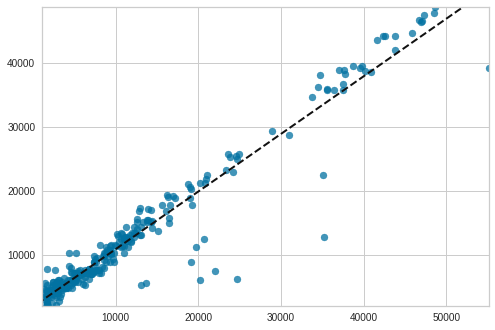

In [53]:
#visualização do resultado do modelo de predição.
viz = PredictionError(gbr)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
#viz.show()

In [126]:
# Teste com o modelo LGBMRegressor.
from lightgbm import LGBMRegressor

X = df[['age', 'bmi', 'smoker_no', 'smoker_yes']]
y = df['charges']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.20, random_state= 13)
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train) 
lgbmr_predict = lgbmr.predict(X_test)
lgbmr_r2score = r2_score(y_test, lgbmr_predict)
lgbmr_rmse = mean_squared_error(y_test, lgbmr_predict, squared=False)
print('r2 score:', lgbmr_r2score)
print('rmse:', lgbmr_rmse)

r2 score: 0.9105913852190579
rmse: 3564.878674337169


In [76]:
df_KnnRegressor = pd.DataFrame({'Atual': yteste, 'Predito': lgbmr_predict})
df_KnnRegressor.head()

,Atual,Predito
5,3756.62,5195.67
109,47055.53,11638.37
892,10422.92,6468.07
1143,6338.08,5797.41
265,46151.12,1632.54


0.9105913852190579

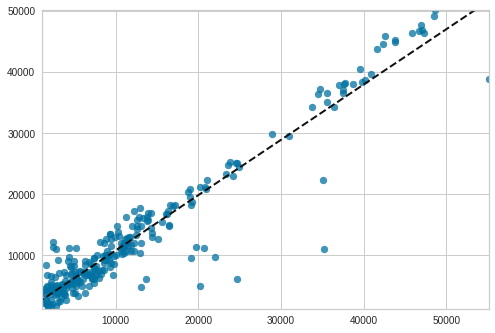

In [63]:
#visualização do resultado do modelo de predição.
viz = PredictionError(lgbmr)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
#viz.show()

In [127]:
# Teste com o modelo RandomForestRegressor.
from sklearn.ensemble import RandomForestRegressor

X = df[['age', 'bmi', 'smoker_no', 'smoker_yes']]
y = df['charges']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.20, random_state= 13)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train) 
rfr_predict = rfr.predict(X_test)
rfr_r2score = r2_score(y_test, rfr_predict)
rfr_rmse = mean_squared_error(y_test, rfr_predict, squared=False)
print('r2 score:', rfr_r2score)
print('rmse:', rfr_rmse)

r2 score: 0.8950517793023425
rmse: 3862.269820807881


In [79]:
df_KnnRegressor = pd.DataFrame({'Atual': yteste, 'Predito': rfr_predict})
df_KnnRegressor.head()

,Atual,Predito
5,3756.62,5743.95
109,47055.53,17444.36
892,10422.92,5278.40
1143,6338.08,6357.85
265,46151.12,3040.93


0.8914123643404597

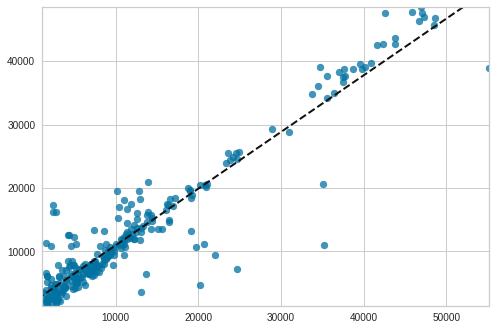

In [80]:
#visualização do resultado do modelo de predição.
viz = PredictionError(rfr)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
#viz.show()

In [128]:
# Teste com o modelo KNeighborsRegressor.
from sklearn.neighbors import KNeighborsRegressor

X = df[['age', 'bmi', 'smoker_no', 'smoker_yes']]
y = df['charges']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.20, random_state= 13)
knnr = KNeighborsRegressor(n_neighbors=2)
knnr.fit(X_train, y_train) 
knnr_predict = knnr.predict(X_test)
knnr_r2score = r2_score(y_test, knnr_predict)
knnr_rmse = mean_squared_error(y_test, knnr_predict, squared=False)
print('r2 score:', knnr_r2score)
print('rmse:', knnr_rmse)

r2 score: 0.5050366271758047
rmse: 8387.675144937091


In [99]:
df_KnnRegressor = pd.DataFrame({'Atual': yteste, 'Predito': knnr_predict})
df_KnnRegressor.head()

,Atual,Predito
5,3756.62,4249.10
109,47055.53,17483.20
892,10422.92,4868.90
1143,6338.08,6306.63
265,46151.12,2444.04


0.5050366271758047

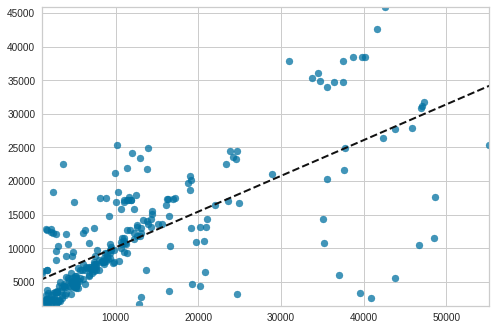

In [131]:
#visualização do resultado do modelo de predição.
viz = PredictionError(knnr)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
#viz.show()

#6 - falta corrigir

In [ ]:
!pip install -U scipy 
import scipy

Requirement already up-to-date: scipy in /usr/local/lib/python3.7/dist-packages (1.6.3)


In [ ]:
#import das bibliotecas para análise estatistica.
from scipy.stats import norm, boxcox
from scipy import stats

In [ ]:
# Média e Desvio Padrão da variável charges usando a biblioteca scipy.
(mu, sigma) = norm.fit(data["charges"])
print("Média {} : {}, Desvio Padrão {} : {}".format("charges", mu, "charges", sigma))

Média charges : 13270.422265141257, Desvio Padrão charges : 12105.484975561612


In [ ]:
#média
data.charges.mean()

13270.422265141257

In [ ]:
#desvio padrão
np.std(data['charges'])

12105.484975561605

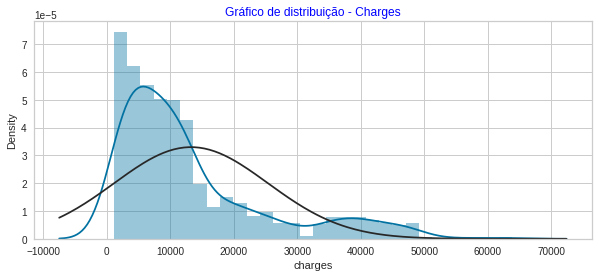

In [ ]:
# Gráfico de distribuição normal
plt.figure(figsize=(10,4))
sns.distplot(data['charges'], fit=norm)
plt.title('Gráfico de distribuição - Charges', color= 'blue')
plt.show()

O gráfico mostra uma distribuição unimodal inclinada para direita

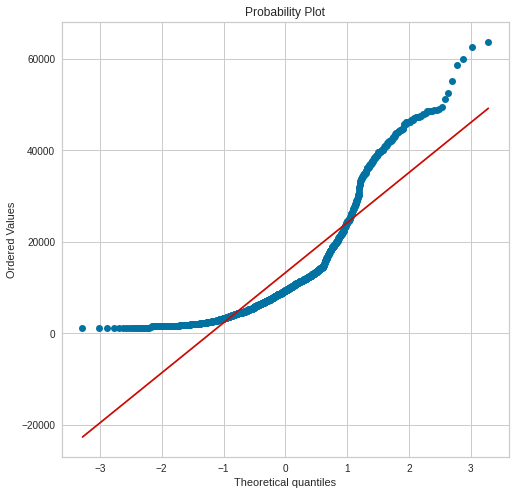

In [ ]:
#gráfico de probabilidade
plt.figure(figsize=(8,8))
stats.probplot(data['charges'], plot= plt)
plt.show()

O gráfico de probabilidade, mostra uma distribuição enviesada para direita, tem um formato similar de um 'C' invertido.

In [ ]:
data['charges'] = np.log1p(data['charges'])
# Média e Desvio Padrão da variável charges usando a biblioteca scipy.
(mu, sigma) = norm.fit(data["charges"])
print("Média {} : {}, Desvio Padrão {} : {}".format("charges", mu, "charges", sigma))

Média charges : 9.098827980629359, Desvio Padrão charges : 0.9190355163595243


In [ ]:
data.charges

0       9.73
1       7.45
2       8.40
3      10.00
4       8.26
        ... 
1333    9.27
1334    7.70
1335    7.40
1336    7.61
1337   10.28
Name: charges, Length: 1338, dtype: float64

# Através de uma busca rápida cheguei ao artigo do [Medium](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9), conforme o artigo escolhi utilizar o log1 para normalização.

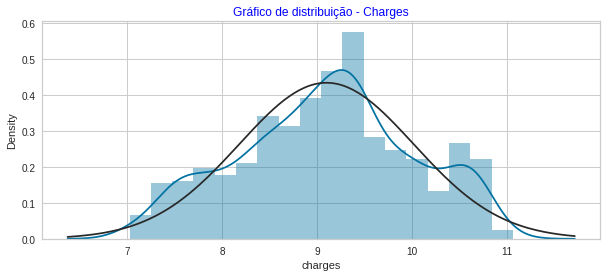

In [ ]:
# Gráfico de distribuição normal
plt.figure(figsize=(10,4))
sns.distplot(data['charges'], fit=norm)
plt.title('Gráfico de distribuição - Charges', color= 'blue')
plt.show()

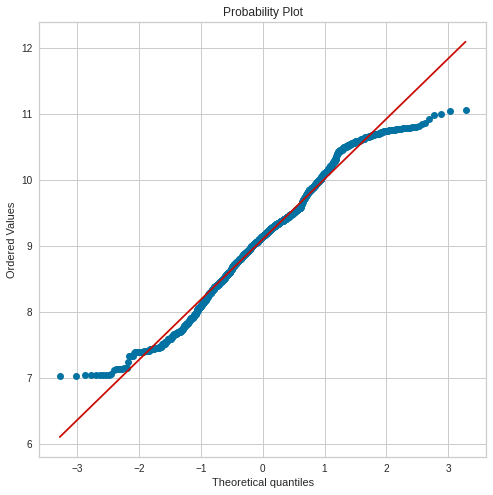

In [ ]:
#gráfico de probabilidade
plt.figure(figsize=(8,8))
stats.probplot(data['charges'], plot= plt)
plt.show()

* após a normalização os nosso gráfico de probabilidade já mostra uma distribuição uniformem(possui uma forma de S). 
Segue um link de referência do [wikipedia](https://en.wikipedia.org/wiki/Normal_probability_plot).

* Agora podemos rodar todos os modelos novamente e ver se as predições ficaram melhores.

In [ ]:
X = data.drop(['charges', 'region'], axis=1)
Y = data.charges
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2)
# testando vários modelos de uma vez:

reg= LazyRegressor(verbose=0, ignore_warnings= True, random_state=13)
models, predictions = reg.fit(X_treino, X_teste, Y_treino, Y_teste)
models

100%|██████████| 42/42 [00:04<00:00,  9.14it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.81,0.82,0.40,0.14
SVR,0.80,0.81,0.40,0.10
NuSVR,0.80,0.81,0.41,0.22
LGBMRegressor,0.80,0.80,0.41,0.09
HistGradientBoostingRegressor,0.80,0.80,0.41,0.42
RandomForestRegressor,0.79,0.79,0.42,0.33
KNeighborsRegressor,0.78,0.79,0.43,0.02
AdaBoostRegressor,0.77,0.78,0.44,0.04
BaggingRegressor,0.76,0.77,0.45,0.05
